# <center> Homework 5

### 1. The K Means Clustering Method

#### (1) Create your own Python code (no use of sklearn package) to implement the K-means clustering algorithm.

In [1]:
# Import the library
import numpy as np

In [2]:
# Implement the K-means algorithm
def k_means(X, k, max_iters=200, tol=1e-6):

    # Set the random seed and intermediate variables
    np.random.seed(1)
    n_samples, n_features = X.shape
    new_centers = np.zeros((k, n_features))
    
    # Initialize cluster centers randomly from data points
    initial_indices = np.random.choice(n_samples, k, replace=False)
    centers = X[initial_indices]

    for iteration in range(max_iters):

        # Assign each point to the nearest cluster center
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
        labels = np.argmin(distances, axis=1)

        # Update cluster centers by calculating the mean
        for i in range(k):
            # if a cluster is not empty, calculate the mean as new center
            if len(X[labels == i]) > 0:
                new_centers[i] = X[labels == i].mean(axis=0)
            else:
                # if a cluster is empty, still keep the old center
                new_centers[i] = centers[i]

        # Check for convergence
        if np.all(np.linalg.norm(new_centers - centers, axis=1) < tol):
            break

        centers = new_centers.copy()

    return centers, labels

#### (2) Run your code on the IRIS data set with 𝐾=3 and visualize the clustering results on 2D with any two features. Show different clusters with different colors. Compare the results with the target values of the data set to evaluate the accuracy of your code.

In [3]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.metrics import confusion_matrix
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import accuracy_score

In [4]:
# Load the IRIS dataset
iris = load_iris()
X = iris.data[:, 0:2] # choose the first two features
y = iris.target

In [5]:
# Run K-means clustering with K=3
k = 3
centers, labels = k_means(X, k)

print(y)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


In [6]:
# Mapping function from cluster label to true label
def map_labels(y_true, y_pred):

    # Calculate the confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Solve the linear sum assignment problem
    row_ind, col_ind = linear_sum_assignment(-conf_matrix)

    # Create a mapping from cluster label to true label
    mapping = {col: row for row, col in zip(row_ind, col_ind)}

    # Map the predicted labels to the true labels
    mapped_labels = np.array([mapping[label] for label in y_pred])

    return mapped_labels, mapping

In [7]:
mapped_labels, mapping = map_labels(y, labels)
print(mapped_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 1 2 1 2 1 2 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 2 2 2 2 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 2 2 2 1 2 2 2 2
 2 2 1 1 2 2 2 2 1 2 1 2 1 2 2 1 1 2 2 2 2 2 1 1 2 2 2 1 2 2 2 1 2 2 2 1 2
 2 1]


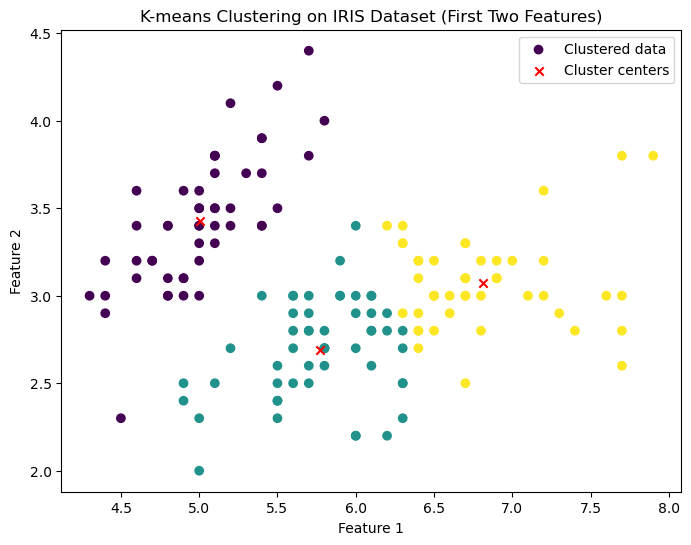

Clustering Accuracy: 0.82


In [8]:
# Visualize clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, label='Clustered data')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', label='Cluster centers')
plt.title("K-means Clustering on IRIS Dataset (First Two Features)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Evaluate accuracy
accuracy = accuracy_score(y, mapped_labels)
print(f"Clustering Accuracy: {accuracy:.2f}")

#### (3) Compare the accuracies of the algorithm on the IRIS data set when different distance definitions are used in the algorithm. Please consider Euclidean distance, Manhantan distance and Chebyshev distance.

In [9]:
# Define different distance metrics
def compute_distances(X, centers, metric):

    if metric == 'euclidean': # Euclidean distance
        return np.linalg.norm(X[:, np.newaxis] - centers, axis=2)
    elif metric == 'manhattan': # Manhattan distance
        return np.sum(np.abs(X[:, np.newaxis] - centers), axis=2)
    elif metric == 'chebyshev': # Chebyshev distance
        return np.max(np.abs(X[:, np.newaxis] - centers), axis=2)
    else:
        raise ValueError(f"Unknown metric: {metric}")

In [10]:
# Modified K-means to accept different distance metrics
def k_means_with_metric(X, k, metric, max_iters=100, tol=1e-6):
    
    # Set the random seed and intermediate variables
    np.random.seed(1)
    n_samples, n_features = X.shape
    new_centers = np.zeros((k, n_features))
    initial_indices = np.random.choice(n_samples, k, replace=False)
    centers = X[initial_indices]

    for iteration in range(max_iters):
        # Compute distances using the specified metric
        distances = compute_distances(X, centers, metric)
        labels = np.argmin(distances, axis=1)

        # Update cluster centers
        new_centers = np.array([
            X[labels == i].mean(axis=0) if len(X[labels == i]) > 0 else centers[i]
            for i in range(k)
        ])

        # Check for convergence
        if np.all(np.linalg.norm(new_centers - centers, axis=1) < tol):
            break

        centers = new_centers.copy()

    return centers, labels

In [11]:
# Compare the accuracies of the algorithms with different distance metrics
metrics = ['euclidean', 'manhattan', 'chebyshev']
for metric in metrics:
    centers, labels = k_means_with_metric(X, k, metric)
    mapped_labels, mapping = map_labels(y, labels)
    accuracy = accuracy_score(y, mapped_labels)
    print(f"Clustering Accuracy with {metric.capitalize()} Distance: {accuracy:.2f}")

Clustering Accuracy with Euclidean Distance: 0.82
Clustering Accuracy with Manhattan Distance: 0.81
Clustering Accuracy with Chebyshev Distance: 0.67


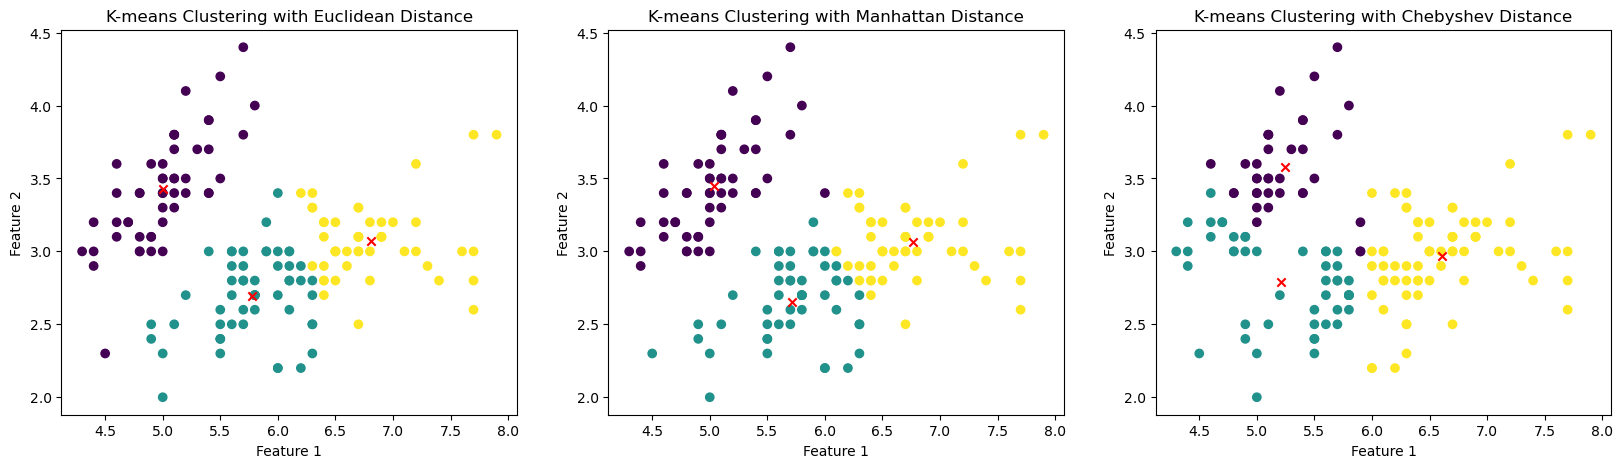

In [12]:
# Plot the clustering results with different distance metrics
plt.figure(figsize=(20, 5))
for i, metric in enumerate(metrics):
    centers, labels = k_means_with_metric(X, k, metric)
    mapped_labels, mapping = map_labels(y, labels)
    plt.subplot(1, 3, i+1)
    plt.scatter(X[:, 0], X[:, 1], c=labels)
    plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x')
    plt.title(f"K-means Clustering with {metric.capitalize()} Distance")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

### 2. The PCA Method

#### Use the PCA method in the sklearn package to visualize the IRIS data set in 2D plane. Show different classes with different colors.

In [13]:
# Importing the libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
import pandas as pd

In [14]:
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# print(X)
# print(y)
# print(target_names)

In [15]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# print(X_pca)

# Create a DataFrame containing the two principal components and the target
df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
df['target'] = y
df['target_name'] = df['target'].apply(lambda x: target_names[x])

print(df[0:5])

        PC1       PC2  target target_name
0 -2.684126  0.319397       0      setosa
1 -2.714142 -0.177001       0      setosa
2 -2.888991 -0.144949       0      setosa
3 -2.745343 -0.318299       0      setosa
4 -2.728717  0.326755       0      setosa


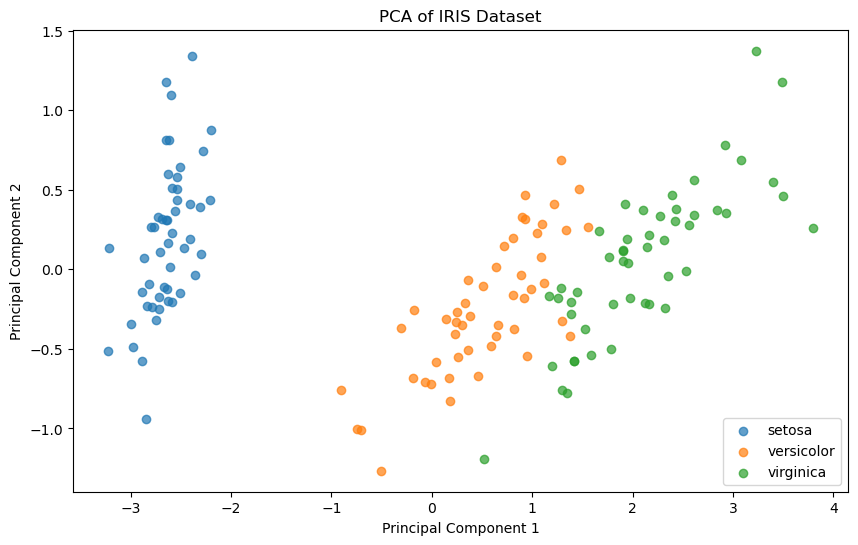

In [16]:
# Plotting
plt.figure(figsize=(10, 6))
colors = ['red', 'green', 'blue']
for target, color in zip(range(len(target_names)), colors):
    subset = df[df['target'] == target]
    plt.scatter(subset['PC1'], subset['PC2'], label=target_names[target], alpha=0.7)

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of IRIS Dataset')
plt.legend()
plt.show()